# ECSE415 - Assignment 2 

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1 Invariance of SIFT Features

## 1.1 Invariance Under Changes in Scale 

### 1.1.1  Compute SIFT keypoints for the reference image

In [33]:
# load image 
img = cv2.imread("book.jpg")

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoint_og, descriptors_og = sift.detectAndCompute(img, None)

### 1.1.2  Scale reference image using scaling factors of (0.2, 0.5, 0.8, 1.25, 2, 5)

In [34]:
scaled_images = [None] * 6
scale = [0.2, 0.5, 0.8, 1.25, 2, 5]
height, width = img.shape[0:2] # image size

num = 6
for i in range(num):
    # rotation marix around the center pixel, 30 degrees,scale of 1.2
    M = cv2.getRotationMatrix2D((width/2,height/2),0,scale[i])
    # Apply the transformation matrix
    scaled_images[i] = cv2.warpAffine(img,M,(width,height))



### 1.1.3 Compute SIFT keypoints for the transformed images

In [35]:
# copy scaled images array into new array
scaled_images_disp = scaled_images
keypoints = [None] * 6
descriptors = [None] * 6

num = 6
plt.figure(figsize=(20,40))
for i in range(num):
    # detect SIFT features, with no masks
    keypoints[i],descriptors[i] = sift.detectAndCompute(scaled_images[i], None)


<Figure size 1440x2880 with 0 Axes>

### 1.1.4 Match all keypoints of the reference image to the transformed images using a brute-force method

In [36]:
# create BFMatcher object
bf = cv2.BFMatcher()

matches = [None] * 6

for i in range(num):
    matches[i] = bf.match(descriptors_og,descriptors[i]) #query image, train image

### 1.1.5 Sort matching keypoints according to the matching distance

In [37]:
# Sort them in the order of their distance.
for i in range(num):
    matches[i] = sorted(matches[i], key = lambda x:x.distance)

### 1.1.6 Display top ten matched keypoints for each pair of reference image and a transformed image

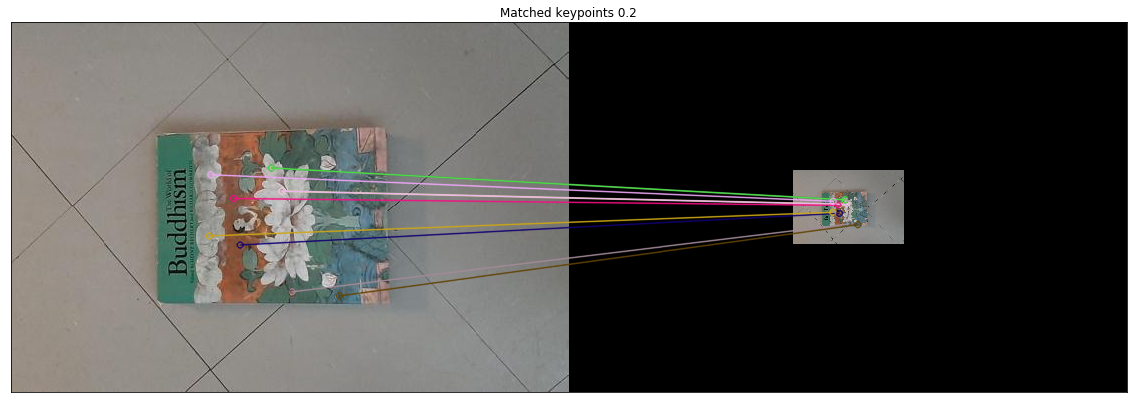

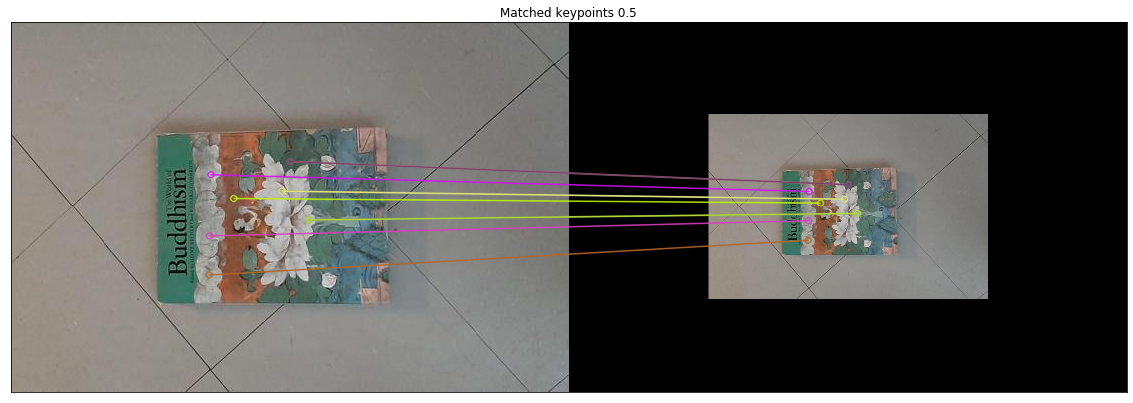

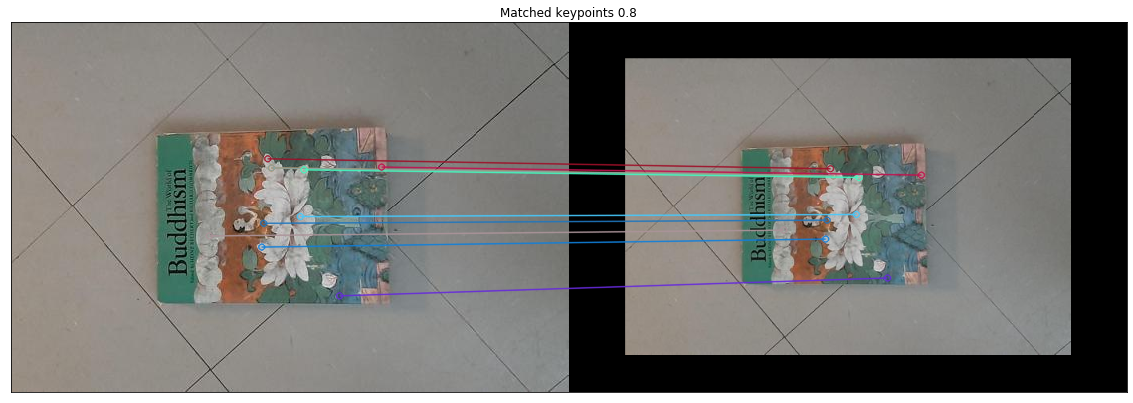

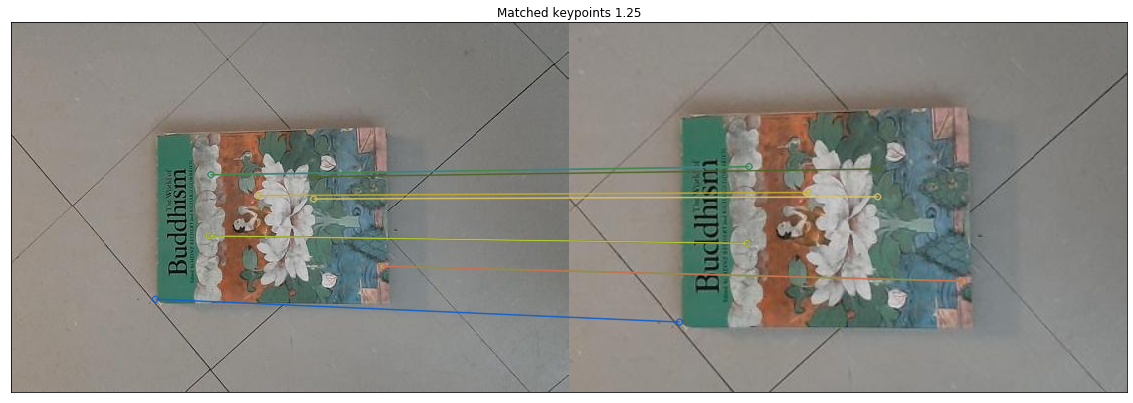

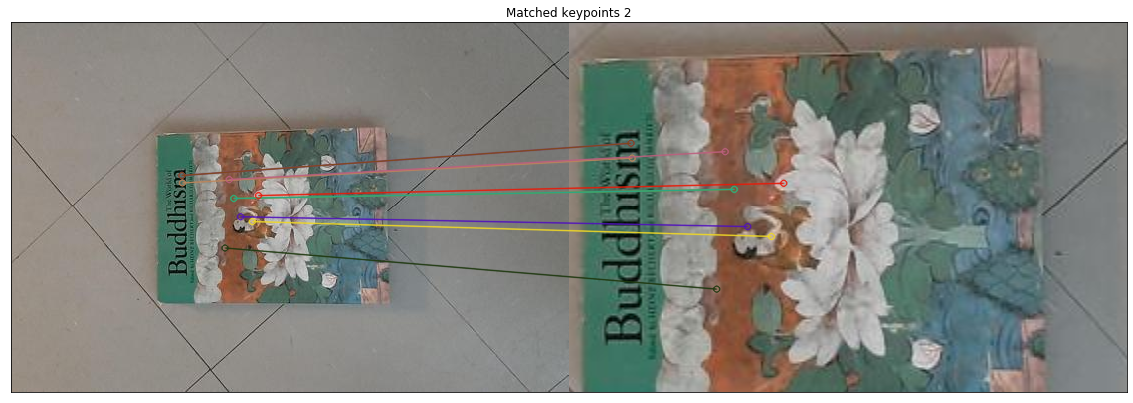

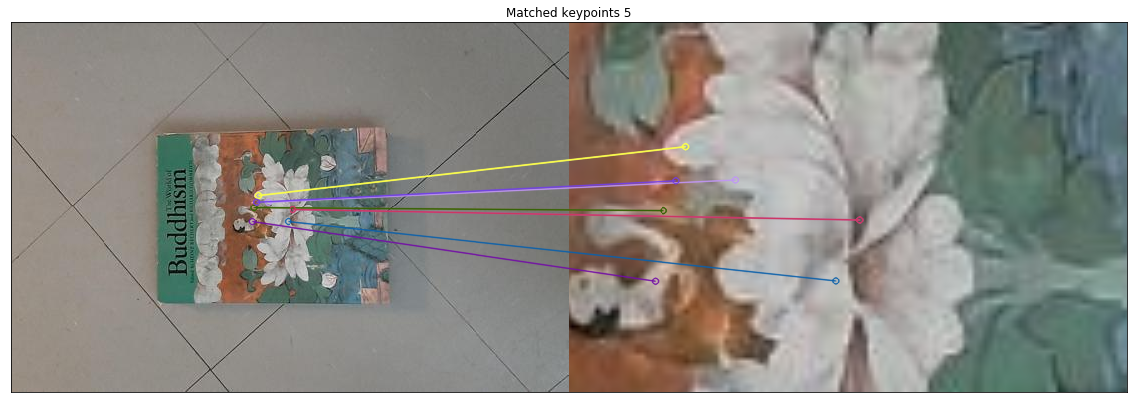

In [38]:
scaled_images_matches = [None] * 6

for i in range(num):
    scaled_images_matches[i] = cv2.drawMatches(img,keypoint_og,scaled_images[i],keypoints[i], matches[i][:10], None, flags=2)
    # display
    plt.figure(figsize=(20,20))
    plt.imshow(scaled_images_matches[i])
    plt.title("Matched keypoints " + str(scale[i])), plt.xticks([]), plt.yticks([])
    plt.show()

### 1.1.7 Plot the matching distance for top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis

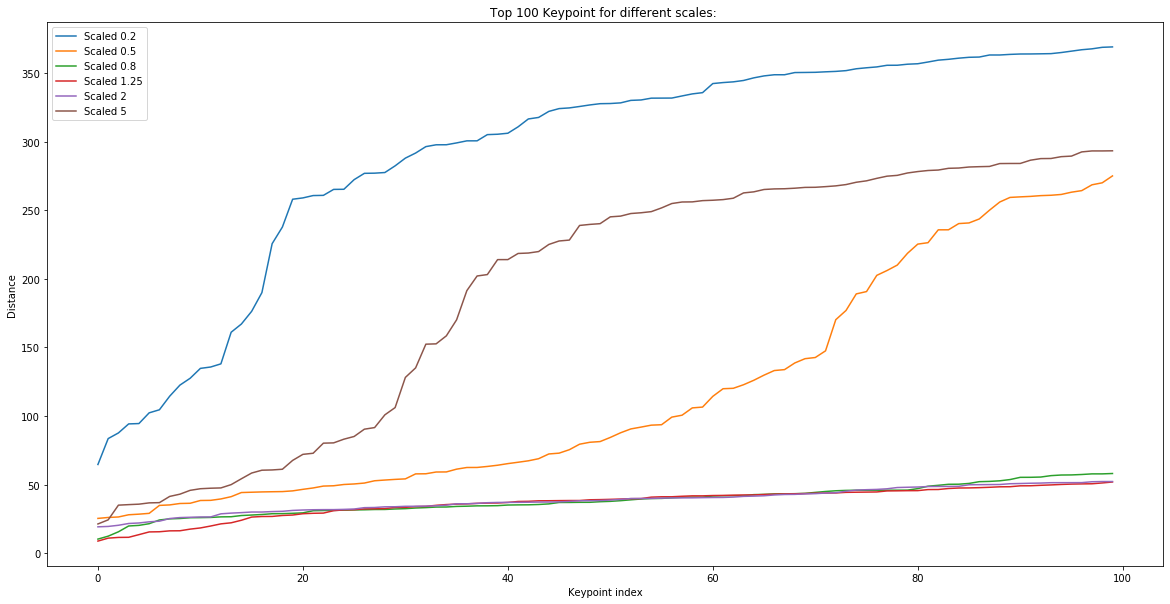

In [39]:
plt.figure(figsize=(20,10))
x_axis = np.arange(100)      
for i in range(6):
    distance_temp = []
    for l, m in enumerate(matches[i]):
        distance_temp.append(m.distance)
    plt.plot(np.arange(100), distance_temp[:100], label="Scaled " + str(scale[i]))
plt.legend()
plt.title("Top 100 Keypoint for different scales: ")
plt.xlabel("Keypoint index")
plt.ylabel("Distance")
plt.show()

### 1.1.8  What is the effect of increasing the scale on the matching distance? Reason the cause

Comparing the curves above, it is clear that the matching distance for scale 0.2, 0.5 and 5 is always higher than the rest. The matching distance decreases from scale 0.2 to scales around 1 (0.8, 1.25 and 2) then increases when increasing the scale to 5.
This can best be explained by the fact that as the scale of our image increases, the image becomes more "clear" for the same size. Thus, for a scale close to 1, the matching distance will be lower than for a scale lower than 1 because the keypoints found in the higher scale image are more precise.  
We can also explain the fact that the matching distance increases when the scale is greater than 1 by the fact that as we zoom into our image too much, we blur the details and hence lose the precision which we are comparing to.

## 1.2  Invariance under Rotation

### 1.2.1  Compute SIFT keypoints for the reference image

In [40]:
# load image 
img = cv2.imread("book.jpg")

# convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# detect SIFT features, with no masks
keypoint_og, descriptors_og = sift.detectAndCompute(img, None)

### 1.2.2 Rotate reference image at the angle of (10,30,90,150,170,180) degrees

In [41]:

rotated_images = [None] * 6
angles = [10,30,90,150,170,180]
height, width = img.shape[0:2] # image size

num = 6
for i in range(num):
    # rotation marix around the center pixel, 30 degrees,scale of 1.2
    M = cv2.getRotationMatrix2D((width/2,height/2),angles[i],1)
    # Apply the transformation matrix
    rotated_images[i] = cv2.warpAffine(img,M,(width,height))

### 1.2.3 Compute SIFT keypoints for the transformed images

In [42]:
# copy scaled images array into new array
rotated_images_disp = rotated_images
keypoints = [None] * 6
descriptors = [None] * 6

num = 6
for i in range(num):
    # detect SIFT features, with no masks
    keypoints[i],descriptors[i] = sift.detectAndCompute(rotated_images[i], None)

### 1.2.4 Match all keypoints of the reference image to the transformed images using a brute-force method

In [43]:
# create BFMatcher object
bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

matches = [None] * 6

for i in range(num):
    matches[i] = bf.match(descriptors_og,descriptors[i]) #query image, train image


### 1.2.5 Sort matching keypoints according to the matching distance

In [44]:
# Sort them in the order of their distance.
for i in range(num):
    matches[i] = sorted(matches[i], key = lambda x:x.distance)

### 1.2.6 Display top ten matching keypoints for each pair of reference image and a transformed image

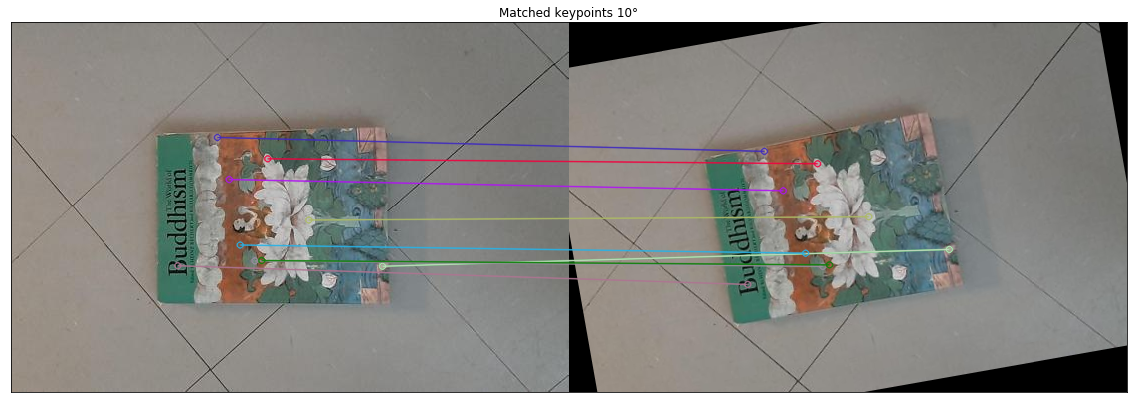

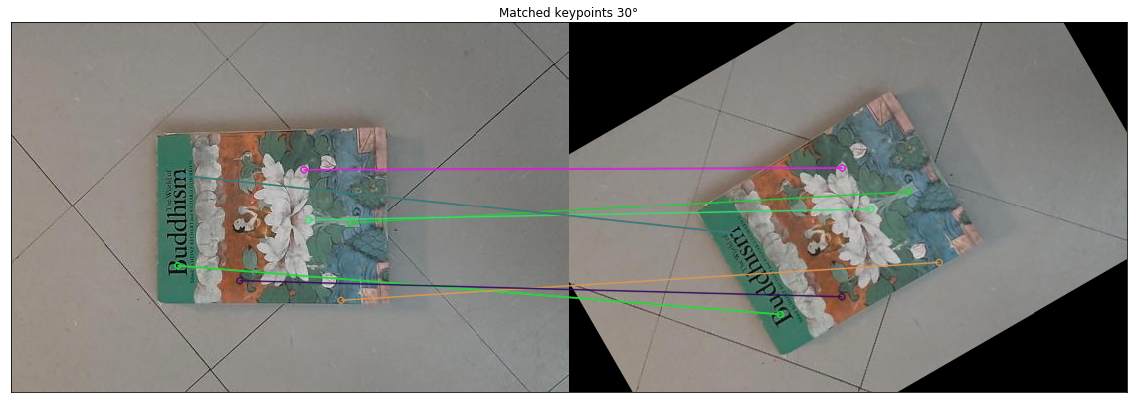

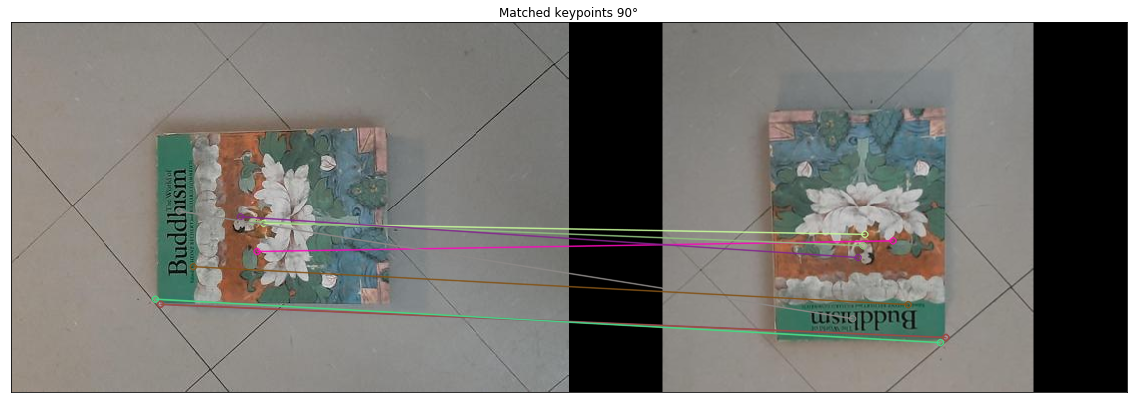

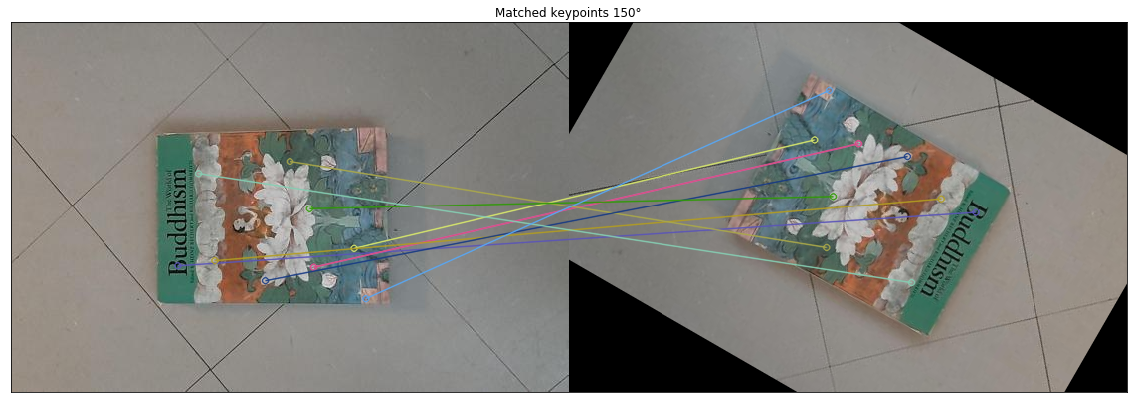

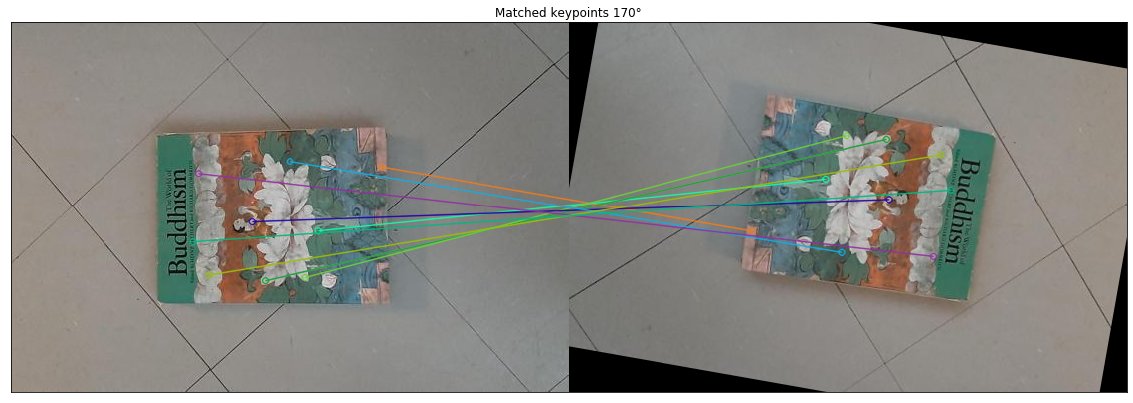

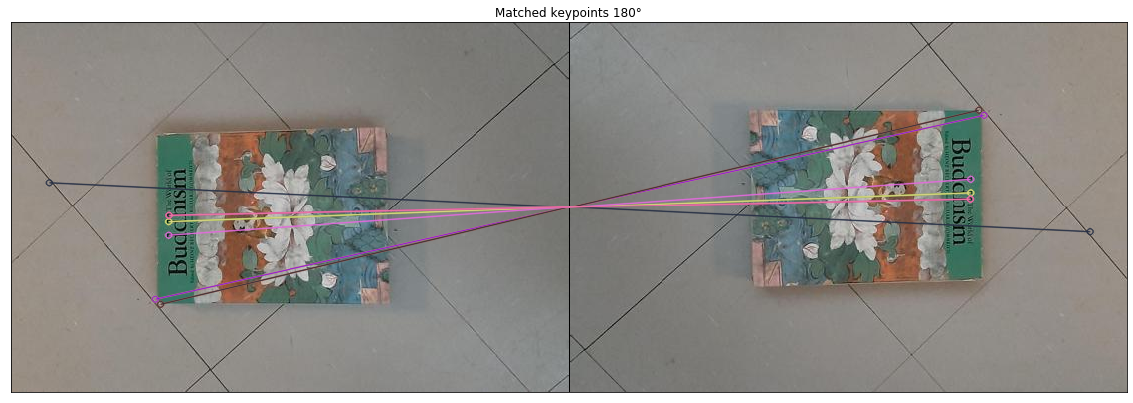

In [45]:
rotated_images_matches = [None] * 6

for i in range(num):
    rotated_images_matches[i] = cv2.drawMatches(img,keypoint_og,rotated_images[i],keypoints[i], matches[i][:10], None, flags=2)
    # display
    plt.figure(figsize=(20,20))
    plt.imshow(rotated_images_matches[i])
    plt.title("Matched keypoints " + str(angles[i]) +  u"\u00b0"), plt.xticks([]), plt.yticks([])
    plt.show()

### 1.2.7 Plot the matching distance for top 100 matched keypoints. Plot indices of keypoints on x-axis and corresponding matching distance on y-axis

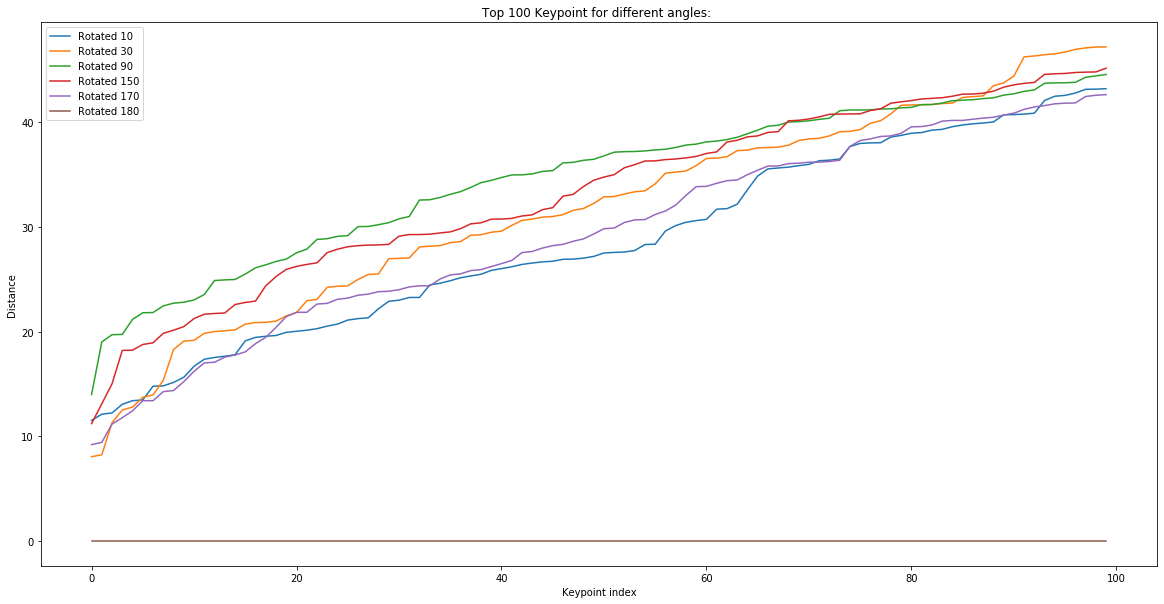

In [46]:
# Arrange matching keypoints in two seperate lists
plt.figure(figsize=(20,10))     
for i in range(6):
    distance_temp = []
    for l, m in enumerate(matches[i]):
        distance_temp.append(m.distance)
    plt.plot(np.arange(100), distance_temp[:100], label="Rotated " + str(angles[i]))
plt.legend()
plt.title("Top 100 Keypoint for different angles: ")
plt.xlabel("Keypoint index")
plt.ylabel("Distance")
plt.show()

### 1.2.8 What is the effect of increasing the angle of rotation on the matching distance? Reason the cause

Comparing the curves above, we see that the curve of the 90 degrees rotation is the highest and the curve of the 10 degrees is the lowest. The matching distance increases as the angle increases then it decreases from 90 degrees. 